# Create method to deal with 365 day calendar

Steps:

1. Load the DataArray
2. Convert to Pandas DataFrame
3. Create a new time index with all of the days using `date_range`
4. Reindex using the new time index
5. Fill the NaNs with something
6. Return DF

In [1]:
from pathlib import Path

import numpy as np
import pandas as pd
import xarray as xr

In [2]:
pabrc_atm_temp = xr.open_dataset('station-data/PABRC-atm_temp.nc')

In [4]:
df = pabrc_atm_temp.to_dataframe()

In [5]:
df

,g0_lat_1,g0_lon_2,POT_GDS0_DBSL_ave6h
initial_time0_hours,,,
2012-01-01 06:00:00,71.25,203.25,271.549988
2012-01-02 06:00:00,71.25,203.25,271.549988
2012-01-03 06:00:00,71.25,203.25,271.549988
2012-01-04 06:00:00,71.25,203.25,271.549988
2012-01-05 06:00:00,71.25,203.25,271.579987
...,...,...,...
2021-02-24 06:00:00,71.25,203.25,271.579987
2021-02-25 06:00:00,71.25,203.25,271.579987
2021-02-26 06:00:00,71.25,203.25,271.579987


In [6]:
df.index

DatetimeIndex(['2012-01-01 06:00:00', '2012-01-02 06:00:00',
               '2012-01-03 06:00:00', '2012-01-04 06:00:00',
               '2012-01-05 06:00:00', '2012-01-06 06:00:00',
               '2012-01-07 06:00:00', '2012-01-08 06:00:00',
               '2012-01-09 06:00:00', '2012-01-10 06:00:00',
               ...
               '2021-02-19 06:00:00', '2021-02-20 06:00:00',
               '2021-02-21 06:00:00', '2021-02-22 06:00:00',
               '2021-02-23 06:00:00', '2021-02-24 06:00:00',
               '2021-02-25 06:00:00', '2021-02-26 06:00:00',
               '2021-02-27 06:00:00', '2021-02-28 06:00:00'],
              dtype='datetime64[ns]', name='initial_time0_hours', length=3345, freq=None)

In [8]:
new_times = pd.date_range(start=df.index[0], end=df.index[-1], freq='D')

In [9]:
new_times

DatetimeIndex(['2012-01-01 06:00:00', '2012-01-02 06:00:00',
               '2012-01-03 06:00:00', '2012-01-04 06:00:00',
               '2012-01-05 06:00:00', '2012-01-06 06:00:00',
               '2012-01-07 06:00:00', '2012-01-08 06:00:00',
               '2012-01-09 06:00:00', '2012-01-10 06:00:00',
               ...
               '2021-02-19 06:00:00', '2021-02-20 06:00:00',
               '2021-02-21 06:00:00', '2021-02-22 06:00:00',
               '2021-02-23 06:00:00', '2021-02-24 06:00:00',
               '2021-02-25 06:00:00', '2021-02-26 06:00:00',
               '2021-02-27 06:00:00', '2021-02-28 06:00:00'],
              dtype='datetime64[ns]', length=3347, freq='D')

In [37]:
# complains about monotonicity
#df.reindex(index=new_times, columns=['POT_GDS0_DBSL_ave6h'], method='nearest')

In [38]:
new_df = df.reindex(index=new_times, columns=['POT_GDS0_DBSL_ave6h'])

In [46]:
# should be 2 - leap year days
np.sum(np.isnan(new_df['POT_GDS0_DBSL_ave6h'].values))

2

In [47]:
new_df.fillna(method='ffill', inplace=True)

<AxesSubplot:>

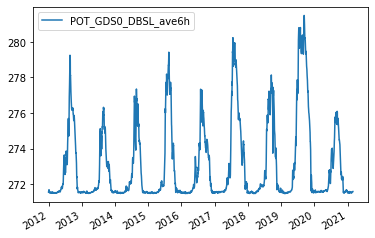

In [49]:
new_df.plot()

In [63]:
%%writefile load_data.py
import pandas as pd
import xarray as xr

def load_data(fname, var):
    with xr.open_dataset(fname) as ds:
        df = ds.to_dataframe()
     
    new_times = pd.date_range(start=df.index[0], end=df.index[-1], freq='D')
    new_df = df.reindex(index=new_times, columns=[var])
    new_df.fillna(method='ffill', inplace=True)
    
    return new_df

Writing load_data.py


In [59]:
new_df_verify = load_data('station-data/PABRC-atm_temp.nc', 'POT_GDS0_DBSL_ave6h')

In [61]:
new_df_verify.compare(new_df)

Empty DataFrame
Columns: []
Index: []

In [62]:
new_df_verify.equals(new_df)

True